In [22]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math


In [3]:
num_house = 160
np.random.seed(42)
house_sizes = np.random.randint(low=1000, high=3500, size=num_house)
np.random.seed(42)
house_prices = house_sizes * 100 + np.random.randint(low=20000, high=70000, size=num_house)

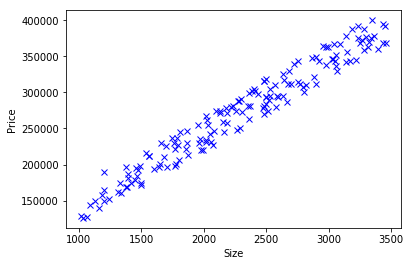

In [4]:
plt.plot(house_sizes, house_prices, 'bx')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

In [5]:
def normalize(array):
    return (array - array.mean())/array.std()

In [6]:
ratio = 0.8 # ratio of training examples to total data 
training_set_size = math.floor(ratio * num_house)
test_set_size = num_house - training_set_size
training_set, test_set = {}, {}

In [7]:
size_train = np.asarray(house_sizes[:training_set_size])
price_train = np.asarray(house_prices[:training_set_size])
size_test = np.asarray(house_sizes[training_set_size:])
price_test = np.asarray(house_prices[training_set_size:])

In [8]:
size_train_norm = normalize(size_train)
price_train_norm = normalize(price_train)
size_test_norm = normalize(size_test)
price_test_norm = normalize(price_test)

In [9]:
tf_house_size = tf.placeholder('float', name = 'house_size')
tf_price = tf.placeholder('float', name = 'price')
tf_size_factor = tf.Variable(np.random.randn(), name = 'size_factor')
tf_price_offset = tf.Variable(np.random.randn(), name = 'price_offset')

In [10]:
# Learn the inference function: Price = size * size_factor + price_offset

tf_price_pred = tf.add(tf.multiply(tf_house_size, tf_size_factor), tf_price_offset)

In [11]:
# Loss calculator
tf_cost = tf.reduce_sum(tf.squared_difference(tf_price, tf_price_pred))/(2 * training_set_size)

In [12]:
learning_rate = 0.1

In [13]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(tf_cost)

In [14]:
init = tf.global_variables_initializer()

In [15]:
num_iterations = 50

In [16]:
sess = tf.Session()
sess.run(init)
for i in range(num_iterations):
    for (x,y) in zip(size_train_norm, price_train_norm):
        sess.run(optimizer, feed_dict={tf_house_size: x, tf_price:y})
    
    display_interval = 2
    fit_num_plots = math.floor(num_iterations / display_interval)
    fit_size_factor = np.zeros(fit_num_plots)
    fit_price_offset = np.zeros(fit_num_plots)
    plot_idx = 0
        
    if (i+1) % display_interval == 0:
        cost = sess.run(tf_cost, feed_dict={tf_price: price_train_norm, tf_house_size: size_train_norm})
        size_factor = sess.run(tf_size_factor)
        price_offset = sess.run(tf_price_offset)
        fit_size_factor[plot_idx] = size_factor
        fit_price_offset[plot_idx] = price_offset
        print('#### Iteration # ',i, '\nCost: ', cost, '\nSize Factor: ', size_factor, '\nPrice Offset', price_offset)


#### Iteration #  1 
Cost:  0.7200903 
Size Factor:  0.09171875 
Price Offset -0.781971
#### Iteration #  3 
Cost:  0.48900822 
Size Factor:  0.25295284 
Price Offset -0.640045
#### Iteration #  5 
Cost:  0.33419317 
Size Factor:  0.38493052 
Price Offset -0.5238636
#### Iteration #  7 
Cost:  0.23047699 
Size Factor:  0.4929607 
Price Offset -0.4287567
#### Iteration #  9 
Cost:  0.16099702 
Size Factor:  0.5813886 
Price Offset -0.35090196
#### Iteration #  11 
Cost:  0.11445428 
Size Factor:  0.6537715 
Price Offset -0.28716993
#### Iteration #  13 
Cost:  0.083278716 
Size Factor:  0.71301985 
Price Offset -0.23499845
#### Iteration #  15 
Cost:  0.06239795 
Size Factor:  0.76151776 
Price Offset -0.19229077
#### Iteration #  17 
Cost:  0.048413787 
Size Factor:  0.80121565 
Price Offset -0.15733
#### Iteration #  19 
Cost:  0.03904948 
Size Factor:  0.8337101 
Price Offset -0.12871088
#### Iteration #  21 
Cost:  0.03277964 
Size Factor:  0.8603086 
Price Offset -0.10528324
#### I

In [17]:
train_size_mean = size_train_norm.mean()
train_size_std = size_train_norm.std()
train_price_mean = price_train_norm.mean()
train_price_std = price_train_norm.std()

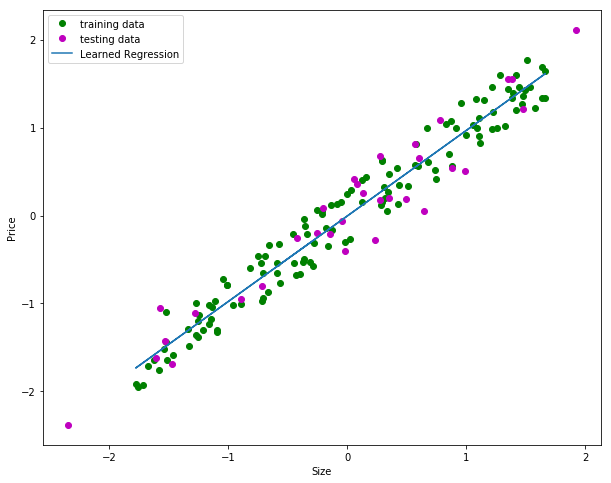

In [18]:
#Without animation
plt.rcParams['figure.figsize'] = [10,8]
plt.figure()
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(size_train_norm, price_train_norm, 'go', label='training data')
plt.plot(size_test_norm, price_test_norm, 'mo', label='testing data')
plt.plot(size_train_norm * train_size_std + train_size_mean, \
         (sess.run(tf_size_factor) * size_train_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,\
        label='Learned Regression')
plt.legend(loc=2) # upper left
plt.show()
sess.close()

Traceback (most recent call last):
  File "/home/sbsatter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "/home/sbsatter/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "/home/sbsatter/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1081, in _start
    self._init_draw()
  File "/home/sbsatter/anaconda3/lib/python3.6/site-packages/matplotlib/animation.py", line 1800, in _init_draw
    for a in self._drawn_artists:
TypeError: 'Line2D' object is not iterable


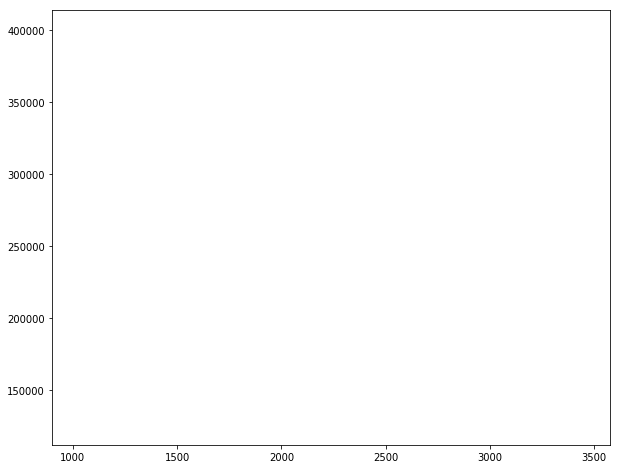

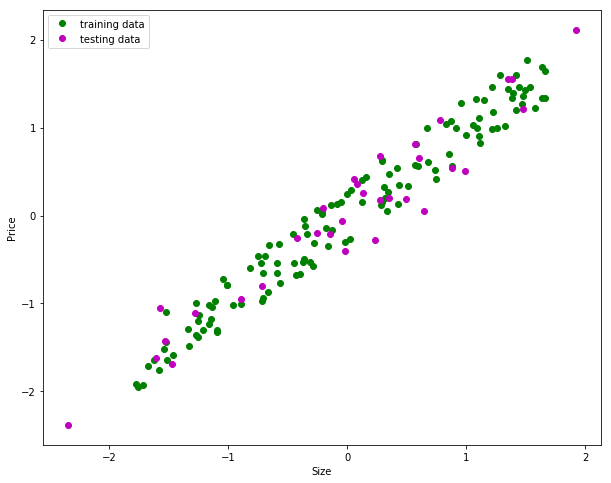

In [30]:
# with animation - DOES NOT WORK
fig, ax = plt.subplots()
line, = ax.plot(house_sizes, house_prices)
plt.rcParams['figure.figsize'] = [10,8]
plt.figure()
plt.xlabel('Size')
plt.ylabel('Price')
plt.plot(size_train_norm, price_train_norm, 'go', label='training data')
plt.plot(size_test_norm, price_test_norm, 'mo', label='testing data')
# plt.plot(size_train_norm * train_size_std + train_size_mean, \
#          (sess.run(tf_size_factor) * size_train_norm + sess.run(tf_price_offset)) * train_price_std + train_price_mean,\
#         label='Learned Regression')
plt.legend(loc=2) # upper left

def animate(i):
    line.set_xdata(size_train_norm * train_size_std + train_size_mean)
    line.set_ydata(fit_size_factor[i] * size_train_norm + fit_price_offset[i] * train_price_std + train_price_mean)
    return line

def init_anim():
    line.set_ydata(np.zeros(house_prices.shape[0]))
    return line

ani = animation.FuncAnimation(fig, animate, frames=np.arange(0, plot_idx), init_func=init_anim, interval=1000, blit=True)
plt.show()

NameError: name 'fig' is not defined